# Ejercicio de programación Regresión Lineal Multiple

In [158]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np
import pandas as pd
# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [159]:
data = np.loadtxt('../Datasets/Cellphone.csv', delimiter=',', skiprows=1)
y = data[:, 1]
X = data[:,2:]

m = y.size

print('{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>10s}{:>8s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:,2]', 'X[:, 3]', 'X[:,4]', 'X[:, 5]', 'X[:,6]', 'X[:, 7]', 'X[:,8]', 'X[:, 9]', 'X[:,10]', 'X[:,11]', 'y'))
print('-'*110)
for i in range(10):
    print('{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.0f}'.format(
        X[i, 0], X[i, 1], X[i, 2], X[i, 3], X[i, 4], X[i, 5], X[i, 6], X[i, 7], X[i, 8], X[i, 9], X[i, 10], X[i, 11], y[i]))


# imprimir algunos puntos de datos


  X[:,0] X[:, 1]  X[:,2] X[:, 3]  X[:,4] X[:, 5]  X[:,6] X[:, 7]  X[:,8] X[:, 9] X[:,10]   X[:,11]       y
--------------------------------------------------------------------------------------------------------------
      10     135       5     424       8       1      16       3      13       8    2610       7      2357
      10     125       4     233       2       1       4       1       3       0    1700      10      1749
      10     110       5     312       4       1       8       2      13       5    2000       8      1916
      11     118       4     233       2       1       4       1       3       0    1400      11      1315
      11     125       4     233       2       1       4       1       3       0    1700      10      1749
      12     150       6     401       4       2      16       2      16       8    2500      10      2137
      13     134       4     233       2       1       8       1       2       0    1560      12      1238
      13     150       6     401 

In [160]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [161]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

Media calculada: [6.21465839e+02 1.70426087e+02 5.20993789e+00 3.35055901e+02
 4.85714286e+00 1.50283230e+00 2.45017143e+01 2.20499379e+00
 1.03782609e+01 4.50310559e+00 2.84211180e+03 8.92173913e+00]
Desviación estandar calculada: [1.54180787e+03 9.25996891e+01 1.50525642e+00 1.34407291e+02
 2.43641408e+00 5.97917122e-01 2.87151776e+01 1.60482416e+00
 6.16235764e+00 4.32854777e+00 1.36273891e+03 2.18574420e+00]
[[-3.96590165e-01 -3.82572418e-01 -6.60212311e-03 ...  8.07867811e-01
  -1.70327419e-01 -6.96210988e-01]
 [-3.96590165e-01 -4.90564141e-01 -8.03808489e-01 ... -1.04032711e+00
  -8.38100234e-01  4.47564206e-01]
 [-3.96590165e-01 -6.52551726e-01 -3.38771442e-01 ...  1.14794716e-01
  -6.17955350e-01 -6.04708972e-01]
 ...
 [ 5.31034658e+00 -2.20584833e-01  1.92699468e-01 ...  3.58016019e+00
   1.15860931e-01 -9.70717034e-01]
 [ 5.39920331e+00 -4.60138647e-03  1.92699468e-01 ...  8.07867811e-01
   4.09387443e-01 -4.67455949e-01]
 [ 5.95763864e+00  3.40972128e-01  5.24868787e-01 ... 

Despues de `featureNormalize` la funcion es provada, se añade el temino de interseccion a `X_norm`:

In [162]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [163]:
print(X)

[[ 1.00000000e+00 -3.96590165e-01 -3.82572418e-01 ...  8.07867811e-01
  -1.70327419e-01 -6.96210988e-01]
 [ 1.00000000e+00 -3.96590165e-01 -4.90564141e-01 ... -1.04032711e+00
  -8.38100234e-01  4.47564206e-01]
 [ 1.00000000e+00 -3.96590165e-01 -6.52551726e-01 ...  1.14794716e-01
  -6.17955350e-01 -6.04708972e-01]
 ...
 [ 1.00000000e+00  5.31034658e+00 -2.20584833e-01 ...  3.58016019e+00
   1.15860931e-01 -9.70717034e-01]
 [ 1.00000000e+00  5.39920331e+00 -4.60138647e-03 ...  8.07867811e-01
   4.09387443e-01 -4.67455949e-01]
 [ 1.00000000e+00  5.95763864e+00  3.40972128e-01 ...  2.65606273e+00
  -1.04283953e-01 -2.38700910e-01]]


In [164]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    J = 0
    
    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    
    return J


In [165]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    
    # Inicializa algunos valores 
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

#### 3.2.1 Seleccionando coheficientes de aprendizaje


theta calculado por el descenso por el gradiente: [2191.03857594  -40.57290869  -45.57096924  -28.52848228  134.61794783
  120.04226605   73.21763494  181.23789303  169.30806908   42.50231332
   52.74857282  101.38345266 -129.25630823]
El precio de un movil con estas caracteristicas seria : $4185


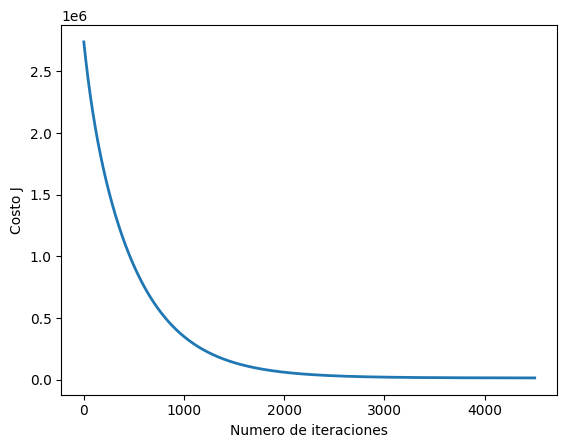

In [166]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001 # alpha = 0.003
num_iters = 4500

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(13)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

#Estimar el precio para de un celular
#Price,Sale,weight,resoloution,ppi,cpucore,cpufreq,internalmem,ram,RearCam,Front_Cam,battery,thickness
#precio,ventas,peso,resolucion,pixeles,CPU,Frecuencia,Memoria,RAM,Camara trasera, Camara frontal,bateria,espesor
X_array = [1, 50,80,5,800,2,2.4,60,8,12,48,4500,9]
X_array[1:] = (X_array[1:] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto
print('El precio de un movil con estas caracteristicas seria : ${:.0f}'.format(price))

In [167]:
X_array = [1, 50, 80, 5, 1000, 2, 2.4, 60, 8, 12, 48, 4500, 9]
X_array[1:] = (X_array[1:] - mu) / sigma


In [168]:
X_array[0:]

[1,
 -0.3706465952579208,
 -0.9765268956751493,
 -0.1394698507055191,
 4.947232361824988,
 -1.1726836086681114,
 1.5004883932545994,
 1.236220308425357,
 3.6109913867222505,
 0.26316861601216834,
 10.048842421393333,
 1.2165853521093368,
 0.035805136511071665]

<a id="section7"></a>
### 2.3 Ecuacion de la Normal

Una manera de calcular rapidamente el modelo de una regresion lineal es:

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Utilizando esta formula no requiere que se escale ninguna caracteristica, y se obtendra una solucion exacta con un solo calculo: no hay “bucles de convergencia” como en el descenso por el gradiente. 

Primero se recargan los datos para garantizar que las variables no esten modificadas. Recordar que no es necesario escalar las caracteristicas, se debe agregar la columna de unos a la matriz $X$ para tener el termino de intersección($\theta_0$). 

In [169]:
data = np.loadtxt('../Datasets/Cellphone.csv', delimiter=',', skiprows=1)
y = data[:, 1]
X = data[:, 2:]
m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [170]:
def normalEqn(X, y):
  
    theta = np.zeros(X.shape[1])
    
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    
    return theta

In [171]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [1, 50, 80, 5, 1000, 2, 2.4, 60, 8, 12, 48, 4500, 9]
price = np.dot(X_array, theta) 

print('Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 1.74955093e+03 -2.27466762e-02 -3.79634036e-01 -7.75920306e+01
  1.00571813e+00  5.39808906e+01  1.31891648e+02  6.24992624e+00
  9.32031847e+01  5.04528682e+00  8.96839734e+00  1.25890285e-01
 -7.36888218e+01]
Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): $4275
